In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

## **_Example 1_**

In [35]:
data , true_labels = make_blobs(n_samples = 300, centers = 3, cluster_std = 2.0, random_state = 42)

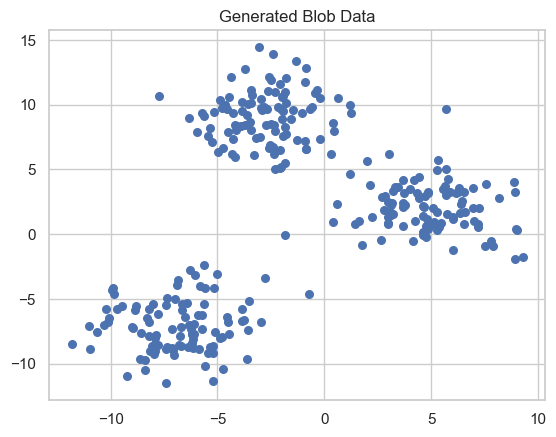

In [36]:
plt.scatter(data[:, 0], data[:, 1], s=30)
plt.title("Generated Blob Data")
plt.show()

In [37]:
from sklearn.mixture import GaussianMixture

In [38]:
gmm = GaussianMixture(n_components = 3, random_state=42)

In [39]:
gmm.fit(data)

,"n_components n_components: int, default=1The number of mixture components.",3
,"covariance_type covariance_type: {'full', 'tied', 'diag', 'spherical'}, default='full'String describing the type of covariance parameters to use.Must be one of:- 'full': each component has its own general covariance matrix.- 'tied': all components share the same general covariance matrix.- 'diag': each component has its own diagonal covariance matrix.- 'spherical': each component has its own single variance.For an example of using `covariance_type`, refer to:ref:`sphx_glr_auto_examples_mixture_plot_gmm_selection.py`.",'full'
,"tol tol: float, default=1e-3The convergence threshold. EM iterations will stop when thelower bound average gain is below this threshold.",0.001
,"reg_covar reg_covar: float, default=1e-6Non-negative regularization added to the diagonal of covariance.Allows to assure that the covariance matrices are all positive.",1e-06
,"max_iter max_iter: int, default=100The number of EM iterations to perform.",100
,"n_init n_init: int, default=1The number of initializations to perform. The best results are kept.",1
,"init_params init_params: {'kmeans', 'k-means++', 'random', 'random_from_data'}, default='kmeans'The method used to initialize the weights, the means and theprecisions.String must be one of:- 'kmeans' : responsibilities are initialized using kmeans.- 'k-means++' : use the k-means++ method to initialize.- 'random' : responsibilities are initialized randomly.- 'random_from_data' : initial means are randomly selected data points... versionchanged:: v1.1 `init_params` now accepts 'random_from_data' and 'k-means++' as initialization methods.",'kmeans'
,"weights_init weights_init: array-like of shape (n_components, ), default=NoneThe user-provided initial weights.If it is None, weights are initialized using the `init_params` method.",None
,"means_init means_init: array-like of shape (n_components, n_features), default=NoneThe user-provided initial means,If it is None, means are initialized using the `init_params` method.",None
,"precisions_init precisions_init: array-like, default=NoneThe user-provided initial precisions (inverse of the covariancematrices).If it is None, precisions are initialized using the 'init_params'method.The shape depends on 'covariance_type':: (n_components,) if 'spherical', (n_features, n_features) if 'tied', (n_components, n_features) if 'diag', (n_components, n_features, n_features) if 'full'",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given to the method chosen to initialize theparameters (see `init_params`).In addition, it controls the generation of random samples from thefitted distribution (see the method `sample`).Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [40]:
predicted_labels = gmm.predict(data)

In [41]:
cluster_centers = gmm.means_
cluster_centers

array([[-2.75050072,  9.0732438 ],
       [-6.88271329, -7.08025394],
       [ 4.85448595,  2.05010271]])

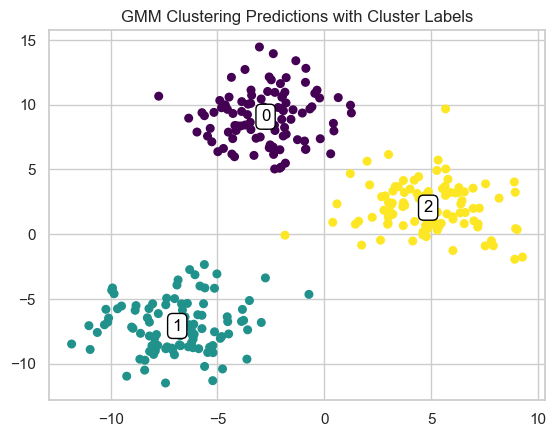

In [42]:
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', s=30, label='Cluster Points')

# Annotate cluster centers with their labels
for idx, (x, y) in enumerate(cluster_centers):
    plt.text(x, y, str(idx), color="black", fontsize=12, ha="center", va="center",
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title("GMM Clustering Predictions with Cluster Labels")
plt.show()

### **_Predict a datapoint_**

In [43]:
new_point = [[0, 3]]

In [44]:
predicted_cluster = gmm.predict(new_point)

In [45]:
print(f"The point {new_point} is predicted to belong to cluster {predicted_cluster[0]}")

The point [[0, 3]] is predicted to belong to cluster 2


In [46]:
probabilities = gmm.predict_proba(new_point)

In [47]:
print(f"Probabilities for each cluster: {probabilities}")

Probabilities for each cluster: [[0.03181571 0.00000075 0.96818353]]


## **_Example 2 [Babe Ruth Card Values]_**

In [48]:
np.random.seed(42)

In [54]:
cluster_1 = np.random.normal(loc=5000, scale=2500, size=300)
cluster_1 = cluster_1[cluster_1 > 0]

In [53]:
cluster_2 = np.random.normal(loc=20000, scale=5000, size=100)
cluster_2 = cluster_2[cluster_2 > 0]

In [55]:
prices = np.concatenate([cluster_1, cluster_2]).reshape(-1, 1)

In [56]:
prices_flat = prices.flatten()

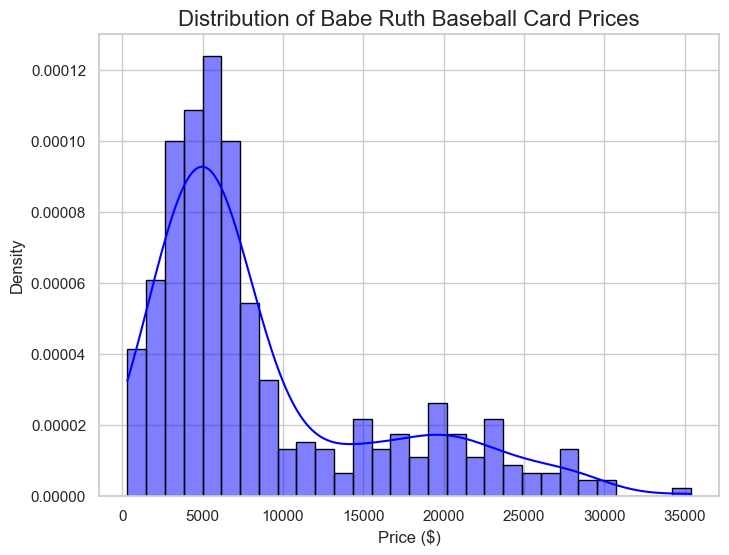

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(prices_flat, kde=True, bins=30, color='blue', edgecolor='black', stat='density')
plt.title("Distribution of Babe Ruth Baseball Card Prices", fontsize=16)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

In [58]:
gmm = GaussianMixture(n_components=2, random_state=42)

In [59]:
gmm.fit(prices)

,"n_components n_components: int, default=1The number of mixture components.",2
,"covariance_type covariance_type: {'full', 'tied', 'diag', 'spherical'}, default='full'String describing the type of covariance parameters to use.Must be one of:- 'full': each component has its own general covariance matrix.- 'tied': all components share the same general covariance matrix.- 'diag': each component has its own diagonal covariance matrix.- 'spherical': each component has its own single variance.For an example of using `covariance_type`, refer to:ref:`sphx_glr_auto_examples_mixture_plot_gmm_selection.py`.",'full'
,"tol tol: float, default=1e-3The convergence threshold. EM iterations will stop when thelower bound average gain is below this threshold.",0.001
,"reg_covar reg_covar: float, default=1e-6Non-negative regularization added to the diagonal of covariance.Allows to assure that the covariance matrices are all positive.",1e-06
,"max_iter max_iter: int, default=100The number of EM iterations to perform.",100
,"n_init n_init: int, default=1The number of initializations to perform. The best results are kept.",1
,"init_params init_params: {'kmeans', 'k-means++', 'random', 'random_from_data'}, default='kmeans'The method used to initialize the weights, the means and theprecisions.String must be one of:- 'kmeans' : responsibilities are initialized using kmeans.- 'k-means++' : use the k-means++ method to initialize.- 'random' : responsibilities are initialized randomly.- 'random_from_data' : initial means are randomly selected data points... versionchanged:: v1.1 `init_params` now accepts 'random_from_data' and 'k-means++' as initialization methods.",'kmeans'
,"weights_init weights_init: array-like of shape (n_components, ), default=NoneThe user-provided initial weights.If it is None, weights are initialized using the `init_params` method.",None
,"means_init means_init: array-like of shape (n_components, n_features), default=NoneThe user-provided initial means,If it is None, means are initialized using the `init_params` method.",None
,"precisions_init precisions_init: array-like, default=NoneThe user-provided initial precisions (inverse of the covariancematrices).If it is None, precisions are initialized using the 'init_params'method.The shape depends on 'covariance_type':: (n_components,) if 'spherical', (n_features, n_features) if 'tied', (n_components, n_features) if 'diag', (n_components, n_features, n_features) if 'full'",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given to the method chosen to initialize theparameters (see `init_params`).In addition, it controls the generation of random samples from thefitted distribution (see the method `sample`).Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [60]:
predicted_labels = gmm.predict(prices)

In [61]:
data_df = pd.DataFrame({
    'Price': prices.flatten(),
    'Cluster': predicted_labels
})

In [62]:
data_df.head(10)

,Price,Cluster
0,7315.443869,0
1,9773.541601,0
2,1503.581065,0
3,6407.423092,0
4,3373.393577,0
5,3782.186541,0
6,3519.015189,0
7,2840.023076,0
8,5121.304070,0
9,2922.624709,0


In [63]:
most_expensive = data_df.sort_values(by='Price', ascending=False)
most_expensive.head(10)

,Price,Cluster
371,35394.404042,1
313,30303.739624,1
353,29823.625665,1
314,28776.704212,1
381,28435.708175,1
367,28224.838568,1
329,28143.077728,1
309,27755.759878,1
387,27615.620386,1
327,27511.785260,1
